<a href="https://colab.research.google.com/github/bachtyarrrr/bachtyarKCBV1/blob/main/pengolahan_citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving nurmansyah.jpg to nurmansyah.jpg


In [19]:
!ls

 nurmansyah.jpg  'orange (1).jpg'   sample_data


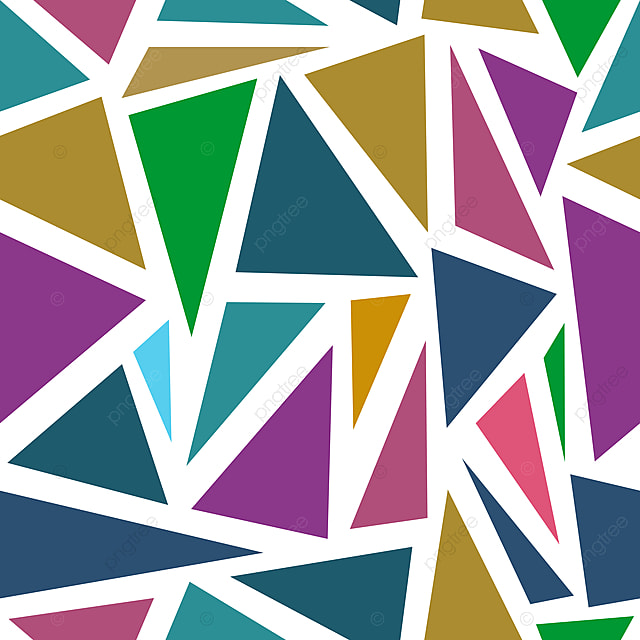

<class 'numpy.ndarray'>


In [20]:
# memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = cv2.imread("nurmansyah.jpg")  
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

# lihat tipe data img. disimpan sebagai apa?
print(type(img))

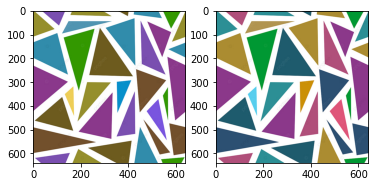

In [21]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig'
fig = plt.figure()
fig.add_subplot(121)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(122)
# subplot, formatnya: (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


plt.show() #untuk menampilkan plot

In [23]:
print(img.shape) #menampilkan resolusi
print(img.size) #menampilkan ukuran data pada media penyimpan
print(img.dtype) #image datatype (kedalaman bit)

(640, 640, 3)
1228800
uint8


In [24]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b, g, r = cv2.split(img)

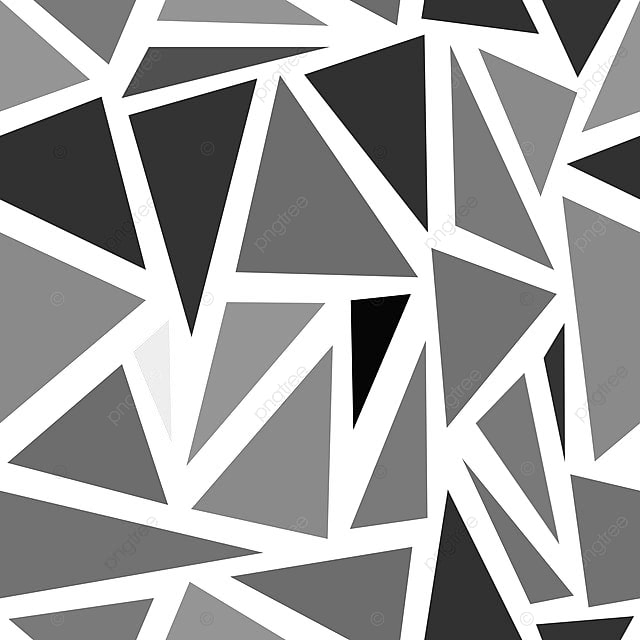

In [25]:
cv2_imshow(b); # menampilkan band biru

In [26]:
# konversi BGR dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

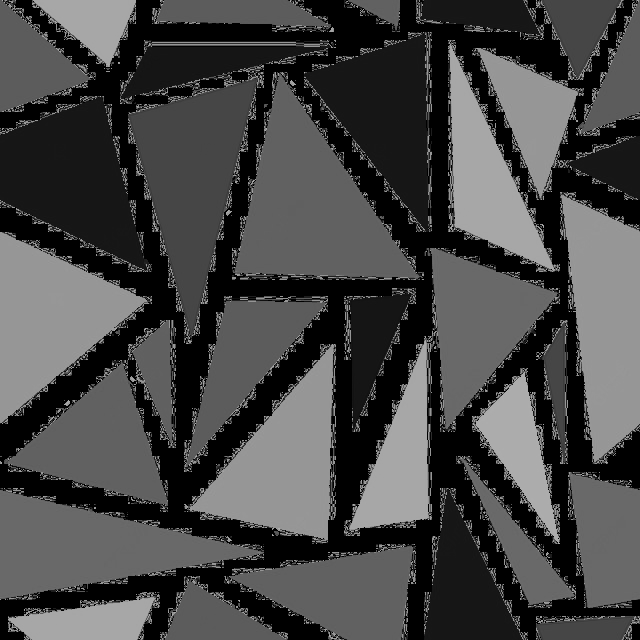

In [27]:
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(h)

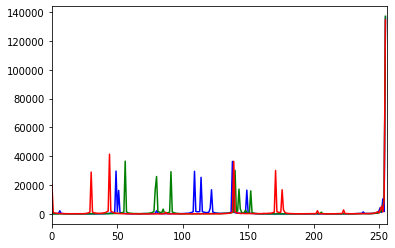

In [28]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

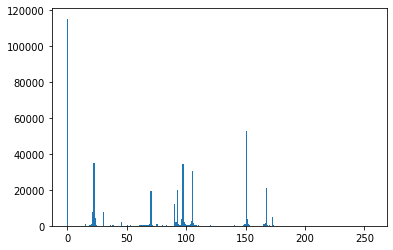

In [29]:
# plotting menggunakan fungsi histogram dari pyplot
# ravel() adalah fungsi numpy untuk mengkonversi array menjadi flat array

# h.ravel() -> menampilkan histogram untuk band Hue (dari variabel pada cell sebelumnya)

plt.hist(h.ravel(),256,[0,256]); 

plt.show()

gambar asal


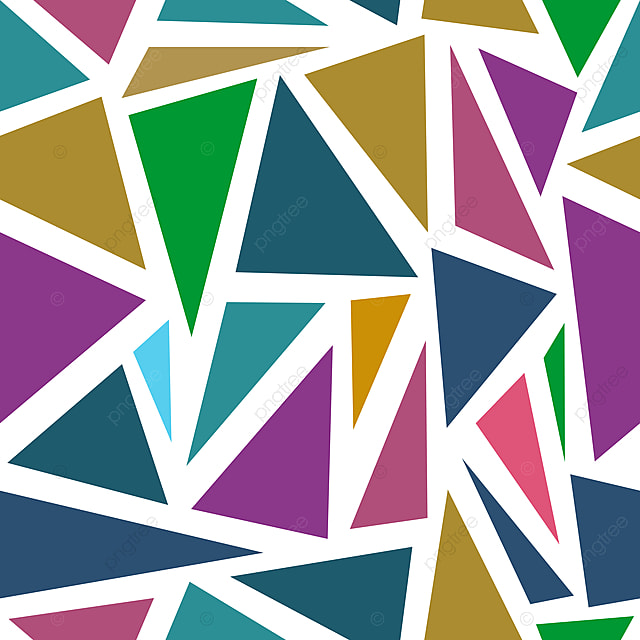

masking warna


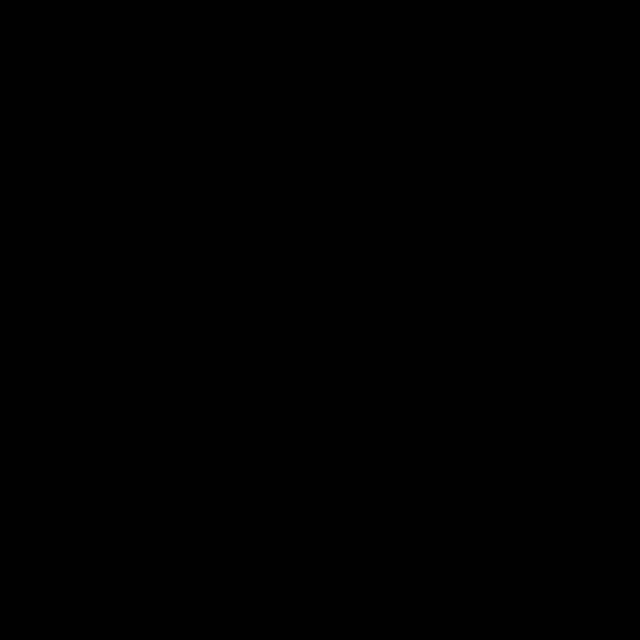

hasil operasi


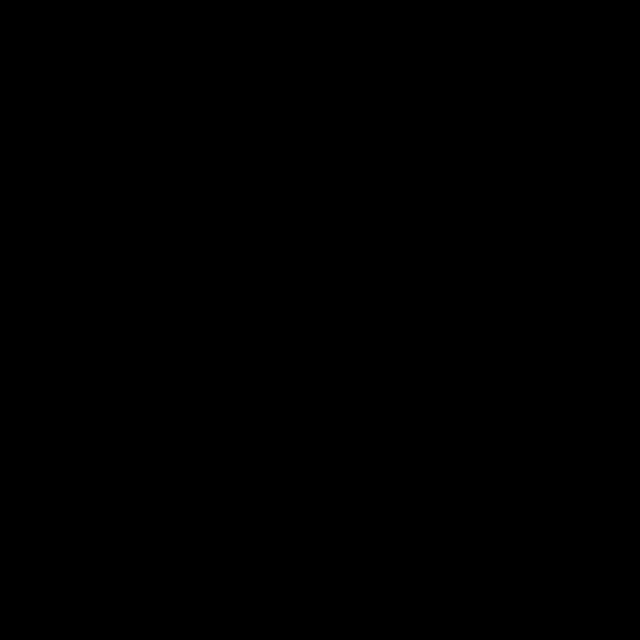

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca citra 'orange.jpg' yang sudah diunggah sebelumnya.
img = cv2.imread('nurmansyah.jpg')


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

# slider adalah salah satu fungsi Google Colab
# 3 dan 27 adalah batas warna orange pada band hue
# rubah slider untuk mencoba hasil akhir yang berbeda
batas_bawah = 252 #@param {type:"slider", min:0, max:360, step:1}
batas_atas = 220 #@param {type:"slider", min:0, max:360, step:1}

# definisi batas warna orange. perhatikan variabel batas_bawah dan batas_atas
lower_orange = np.array([batas_bawah,100,100])
upper_orange = np.array([batas_atas,255,255])

# membuat masking untuk mencari objek sesuai batas warna
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Operasi Bitwise-AND 
res = cv2.bitwise_and(img, img, mask=mask)

# cetak hasil ke layar
print("gambar asal")
cv2_imshow(img);

print("masking warna")
cv2_imshow(mask)

print("hasil operasi")
cv2_imshow(res)

In [31]:
!pip install rasterio